In [5]:
import pandas as pd

doc = pd.read_csv("../../../data-warehouse/csv/ht/wlwq/WoodsLakeMiddle_DissolvedOrganicCarbonNon-Purgeable_profile_Data.csv", encoding='unicode_escape')
print(doc)

                                    Variable                 Date  Depth  \
0    Organic Carbon Non-Purgeable (NPOC Dis)  2014-01-08 15:00:00    0.2   
1    Organic Carbon Non-Purgeable (NPOC Dis)  2014-03-05 12:00:00    0.2   
2    Organic Carbon Non-Purgeable (NPOC Dis)  2014-05-12 13:45:00    0.2   
3    Organic Carbon Non-Purgeable (NPOC Dis)  2014-11-21 11:30:00    0.2   
4    Organic Carbon Non-Purgeable (NPOC Dis)  2015-01-28 11:20:00    0.2   
..                                       ...                  ...    ...   
99   Organic Carbon Non-Purgeable (NPOC Dis)  2024-01-08 14:55:00    0.2   
100  Organic Carbon Non-Purgeable (NPOC Dis)  2024-01-18 15:30:00    0.2   
101  Organic Carbon Non-Purgeable (NPOC Dis)  2024-01-25 11:20:00    0.2   
102  Organic Carbon Non-Purgeable (NPOC Dis)  2024-02-08 15:05:00    0.2   
103  Organic Carbon Non-Purgeable (NPOC Dis)  2024-02-16 10:20:00    0.2   

     Data  QC  
0     4.7   4  
1     3.9   4  
2     8.3   4  
3     4.5   4  
4     4

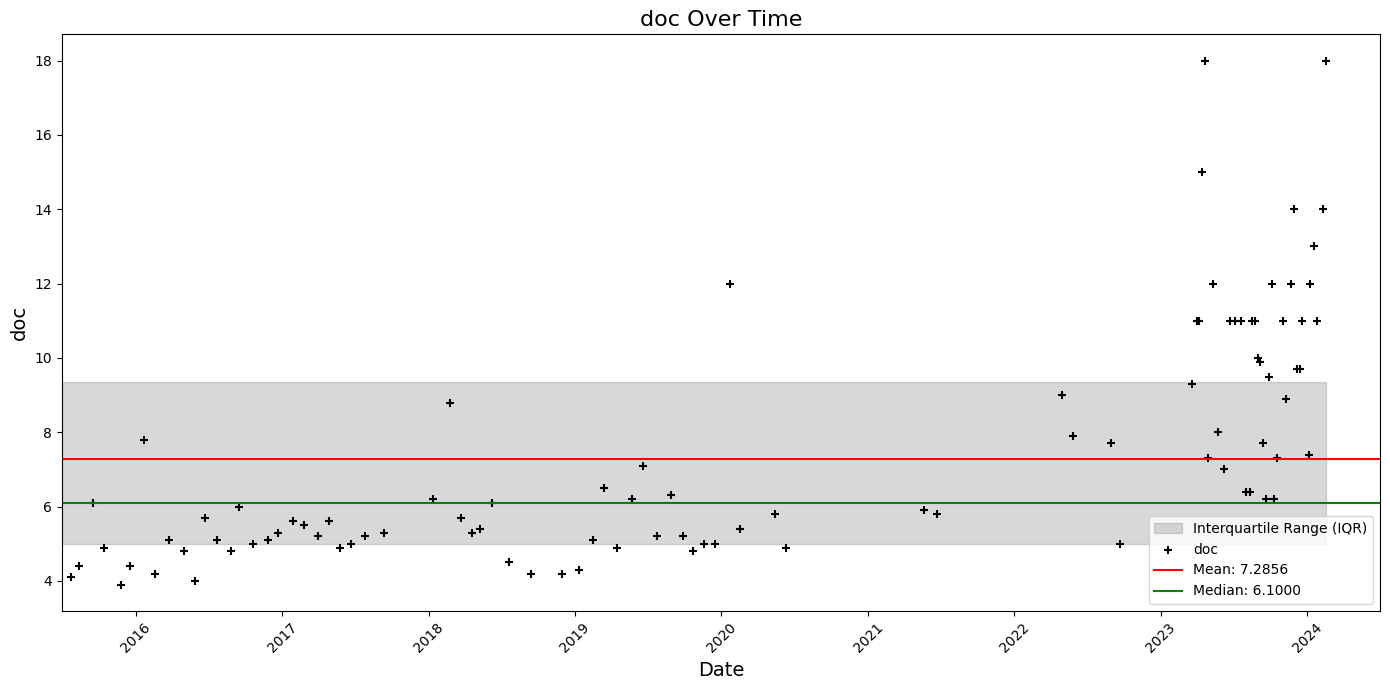

In [6]:
import matplotlib.pyplot as plt
import datetime

# Convert the 'Date' column to datetime
doc['Date'] = pd.to_datetime(doc['Date'])

# Calculate summary statistics
mean_doc = doc['Data'].mean()
median_doc = doc['Data'].median()
q1_doc = doc['Data'].quantile(0.25)
q3_doc = doc['Data'].quantile(0.75)
# std_salinity = sal['Data'].std()

plt.figure(figsize=(14, 7))

# Plot quartile 1 and quartile 3 as an area plot
plt.fill_between(doc['Date'], q1_doc, q3_doc, color='grey', alpha=0.3, label=f'Interquartile Range (IQR)')

# # Plot standard deviation as an area plot
# plt.fill_between(sal['Date'], mean_salinity - std_salinity, mean_salinity + std_salinity, color='grey', alpha=0.3, label=f'Std Dev: ±{std_salinity:.4f}')

# Plot the raw data
plt.scatter(doc['Date'], doc['Data'], label='doc', color='black', marker='+')

# Plot mean, median, and standard deviation
plt.axhline(y=mean_doc, color='red', label=f'Mean: {mean_doc:.4f}')
plt.axhline(y=median_doc, color='green', label=f'Median: {median_doc:.4f}')
# Plot standard deviation as an area plot
# plt.axhline(y=mean_salinity + std_salinity, color='orange', linestyle=':', label=f'Std Dev (+): {mean_salinity + std_salinity:.4f}')
# plt.axhline(y=mean_salinity - std_salinity, color='orange', linestyle=':', label=f'Std Dev (-): {mean_salinity - std_salinity:.4f}')

from datetime import datetime
# plt.xlim([min(sal['Date']), max(sal['Date'])])
doc['Date'] = pd.to_datetime(doc['Date'])

# Define the start and end date for the x-axis limits
start_date = datetime(2015, 7, 1)
end_date = datetime(2024, 7, 1)

# Set the x-axis limits
plt.xlim([start_date, end_date])

# Enhancing the plot
plt.xlabel('Date', fontsize=14)
plt.ylabel('doc', fontsize=14)
plt.title('doc Over Time', fontsize=16)
# plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()

# Display summary statistics as text box
# summary_text = (
#     f'Mean: {mean_salinity:.4f}\n'
#     f'Median: {median_salinity:.4f}\n'
#     f'Std Dev: {std_salinity:.4f}'
# )
# plt.gcf().text(0.02, 0.98, summary_text, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))

plt.show()


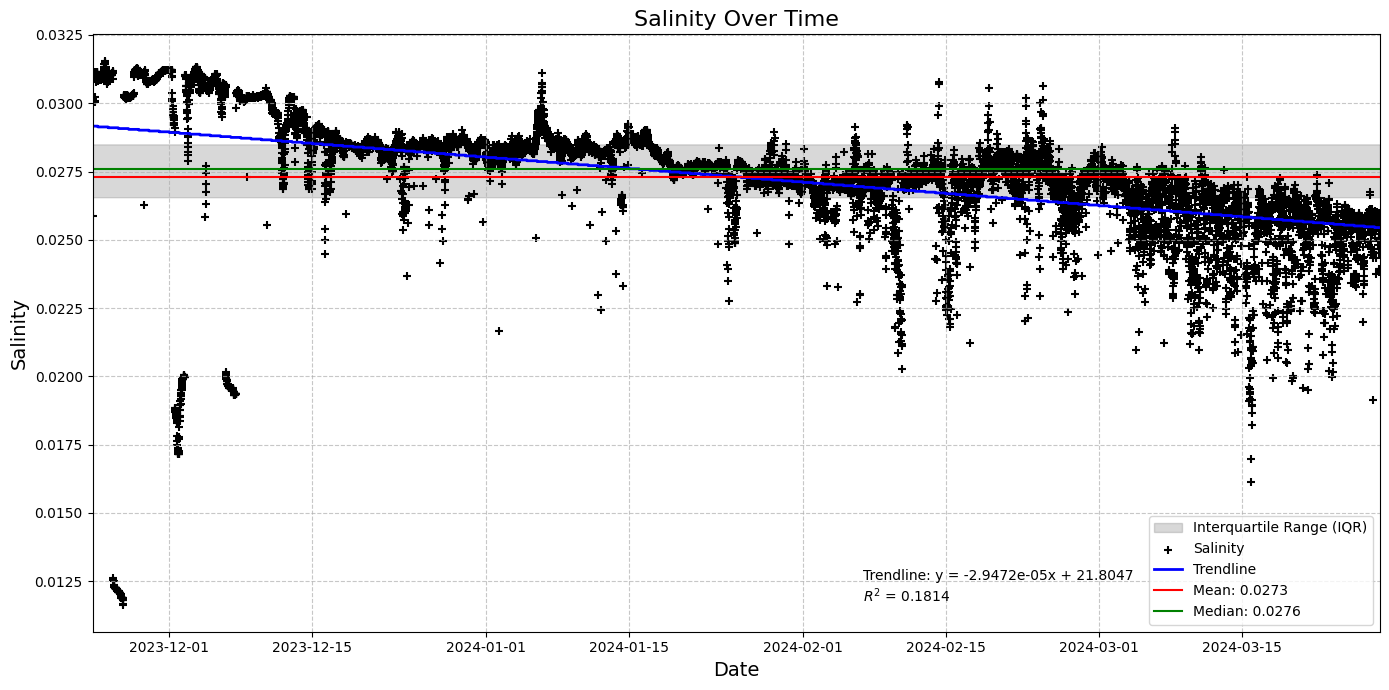

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

file = "../../../data-warehouse/csv/ht/wlwq/WoodsLakeMiddleLakeBedContinuous_Salinity_profile_Data.csv"

# Read the data
sal = pd.read_csv(file, encoding='unicode_escape')

# Convert the 'Date' column to datetime
sal['Date'] = pd.to_datetime(sal['Date'])

# Calculate summary statistics
mean_salinity = sal['Data'].mean()
median_salinity = sal['Data'].median()
q1_salinity = sal['Data'].quantile(0.25)
q3_salinity = sal['Data'].quantile(0.75)

# Convert dates to numerical format for linear regression
sal['Date_ordinal'] = sal['Date'].apply(lambda date: date.toordinal())

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(sal['Date_ordinal'], sal['Data'])

# Create trendline
trendline = slope * sal['Date_ordinal'] + intercept

plt.figure(figsize=(14, 7))

# Plot quartile 1 and quartile 3 as an area plot
plt.fill_between(sal['Date'], q1_salinity, q3_salinity, color='grey', alpha=0.3, label='Interquartile Range (IQR)')

# Plot the raw data
plt.scatter(sal['Date'], sal['Data'], label='Salinity', color='black', marker='+')

# Plot the trendline
plt.plot(sal['Date'], trendline, color='blue', linestyle='-', linewidth=2, label='Trendline')

# Plot mean and median
plt.axhline(y=mean_salinity, color='red', label=f'Mean: {mean_salinity:.4f}')
plt.axhline(y=median_salinity, color='green', label=f'Median: {median_salinity:.4f}')

# Set x-axis limits
plt.xlim([min(sal['Date']), max(sal['Date'])])

# Enhancing the plot
plt.xlabel('Date', fontsize=14)
plt.ylabel('Salinity', fontsize=14)
plt.title('Salinity Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(loc='lower right')
# plt.xticks(rotation=45)
plt.tight_layout()

# Display trendline equation and R^2 value on the plot
equation_text = f'Trendline: y = {slope:.4e}x + {intercept:.4f}\n$R^2$ = {r_value**2:.4f}'
plt.gcf().text(0.62, 0.18, equation_text, fontsize=10, verticalalignment='top')

import os
# Save the plot as a PNG file
output_folder = '../../../outputs/PYTHON_PLOTS'
# Create the directory if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

filename = os.path.basename(file)
filename = os.path.splitext(filename)[0]
filename = filename.replace('_profile_Data', '')

output_file = os.path.join(output_folder, f'{filename}.png')
plt.savefig(output_file, format='png')

plt.show()

In [27]:
import netCDF4

file_path = '/Volumes/Development/projects/Woods/woods_model_tfvaed_0.1/outputs/results/woods_2023_2024_testwq_WQ.nc'
nc = netCDF4.Dataset(file_path, mode="r")
print(nc)

PermissionError: [Errno 1] Operation not permitted: '/Volumes/Development/projects/Woods/woods_model_tfvaed_0.1/outputs/results/woods_2023_2024_testwq_WQ.nc'